Import the `config.json` file for which you would like to run simulations, and the `SimulationEnvironment` class
<details>
<summary><b>Show Example config.json</b></summary>

```json
{
    "simulation_year": 2006,
    "environment": {
        "latitude": 18.53,
        "longitude": 73.85,
        "timezone": "Asia/Kolkata"
    },
    "solar_collector": {
        "f_r_tao_alpha": 0.675,
        "f_r_u_l": 5.656,
        "tilt": 33
    },
    "load_profile": {
        "litres_per_day": 4500,
        "water_density": 998,
        "specific_heat_water": 4180,
        "desired_temperature": 60,
        "consumption_pattern": [
            {
                "start": "06:00",
                "end": "08:00"
            },
            {
                "start": "10:00",
                "end": "11:00"
            },
            {
                "start": "12:00",
                "end": "13:00"
            },
            {
                "start": "14:00",
                "end": "18:00"
            }
        ]
    },
    "storage_tank": {
        "type": "Cylindrical",
        "height_to_diameter_ratio": 1,
        "wall_material": "Mild steel",
        "storage_wall_thicknes": 0.006,
        "thermal_conductivity_wall": 50,
        "insulation_material": "Glass wool",
        "insulation_thickness": 0.2,
        "insulation_thermal_conductivity": 0.04
    }
}
```
</details>

In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

CONFIG_FILE = f'{EXAMPLE_DIR}/config_slc.json'
from models import SimulationEnvironment

We will start the simulation with the solar collector area $A_c = 50$ and the Volume of the storage tank $V_{st} = 5$

In [2]:
AREA = 50
VOLUME = 5
simulation = SimulationEnvironment(AREA, VOLUME, CONFIG_FILE)

Visualizing the Water consumption pattern defined in the provided `config.json`

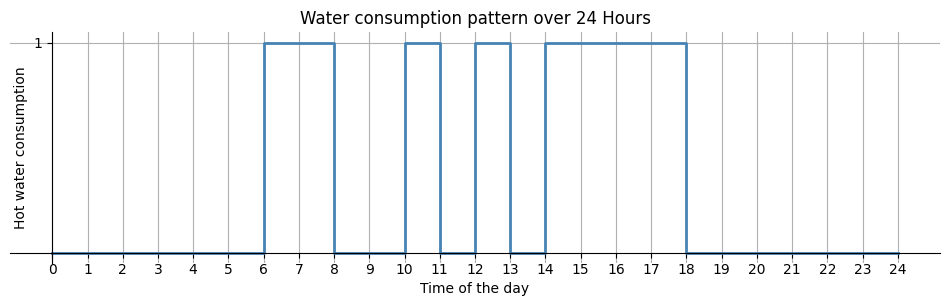

In [3]:
simulation.plot_water_consumption()

Run simulation for for a single day, for the desired `month` and `day` 

Total energy consumed: 1.037 GJ
Auxiliary energy consumed: 0.227 GJ
The solar fraction (F) is: 0.781


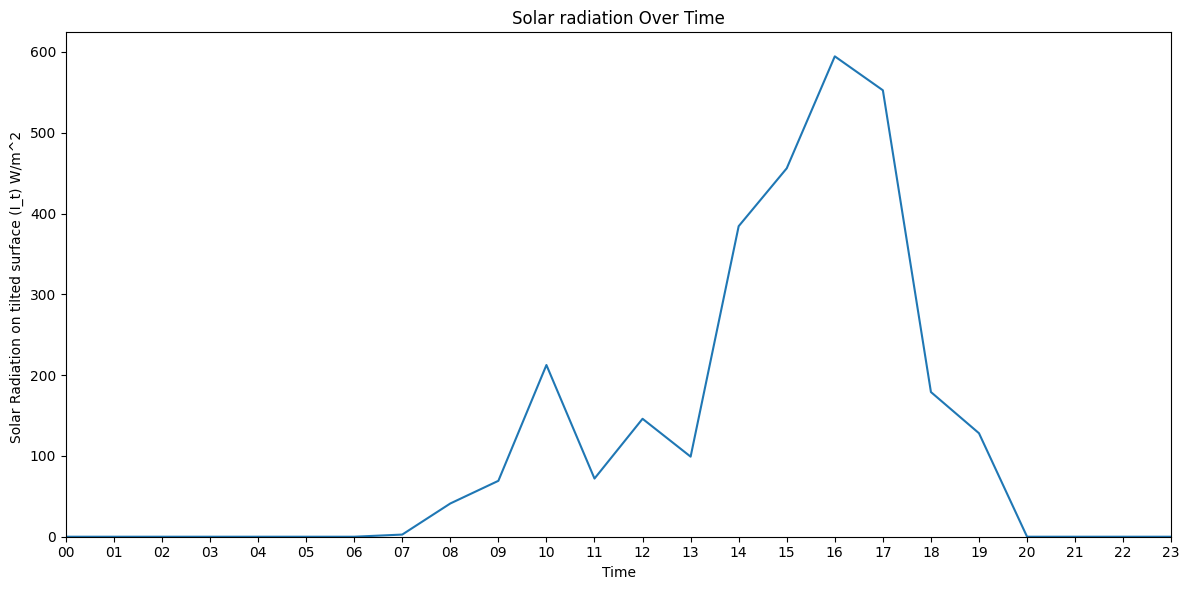

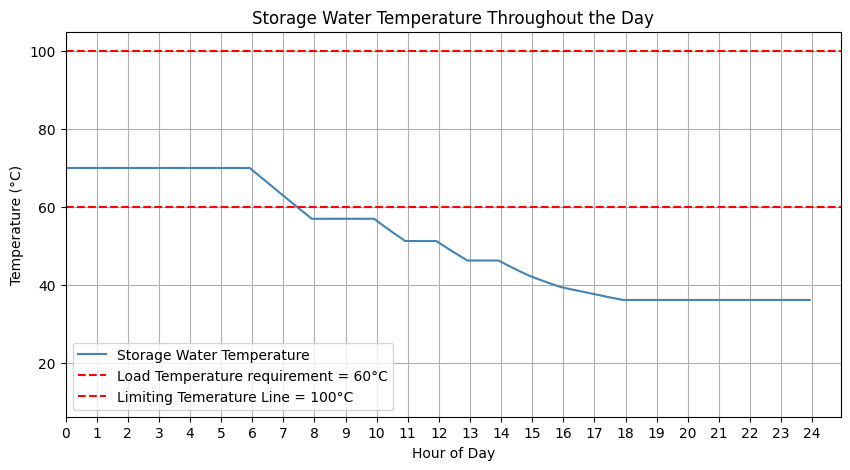

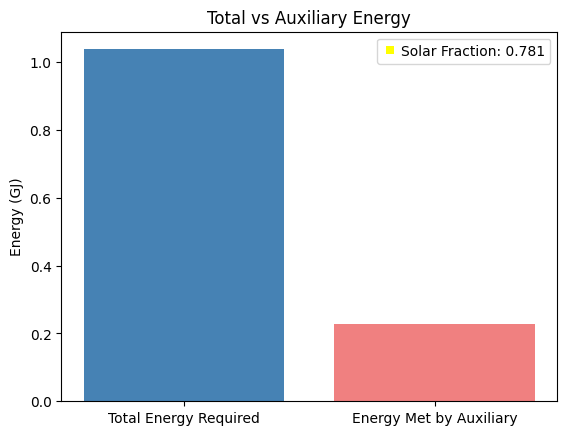

In [4]:
simulation.simulate_single_day(month=4, day=15)

Run simulation for the desired `month`

Total energy consumed: 32.326 GJ
Auxiliary energy consumed: 22.333 GJ
The solar fraction (F) is: 0.309


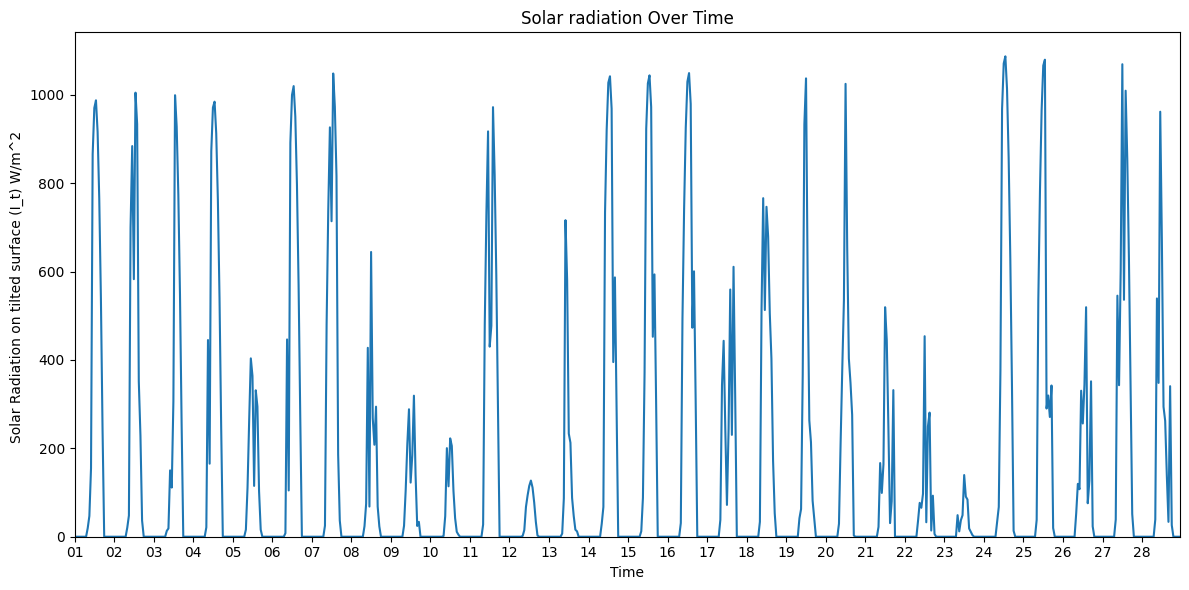

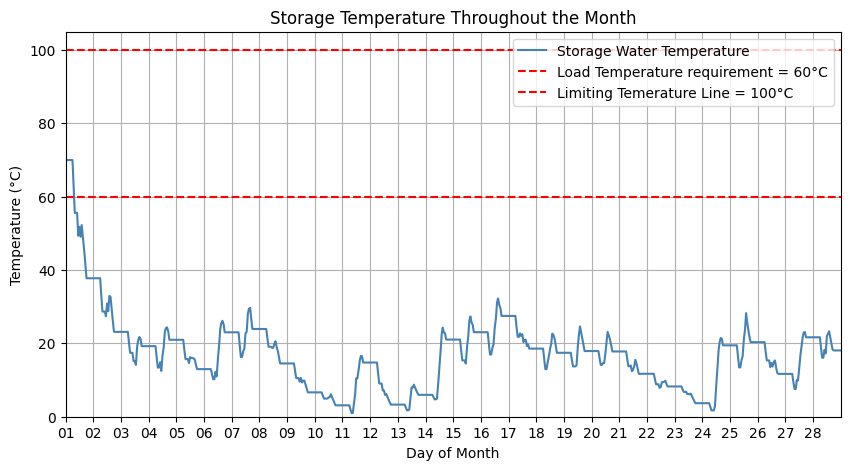

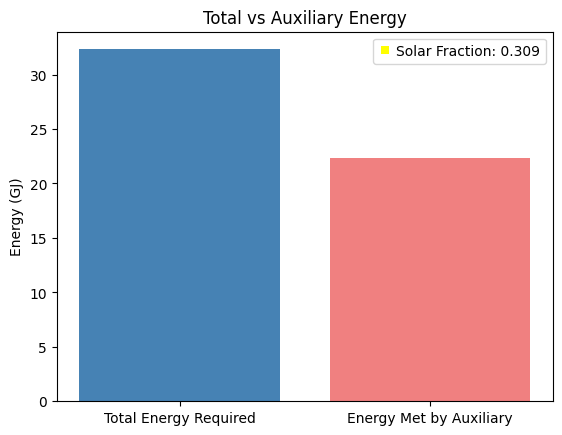

In [5]:
simulation.simulate_month(month=2)

Run simulation for the the entire `year`

Total energy consumed: 329.186 GJ
Auxiliary energy consumed: 175.345 GJ
The solar fraction (F) is: 0.467


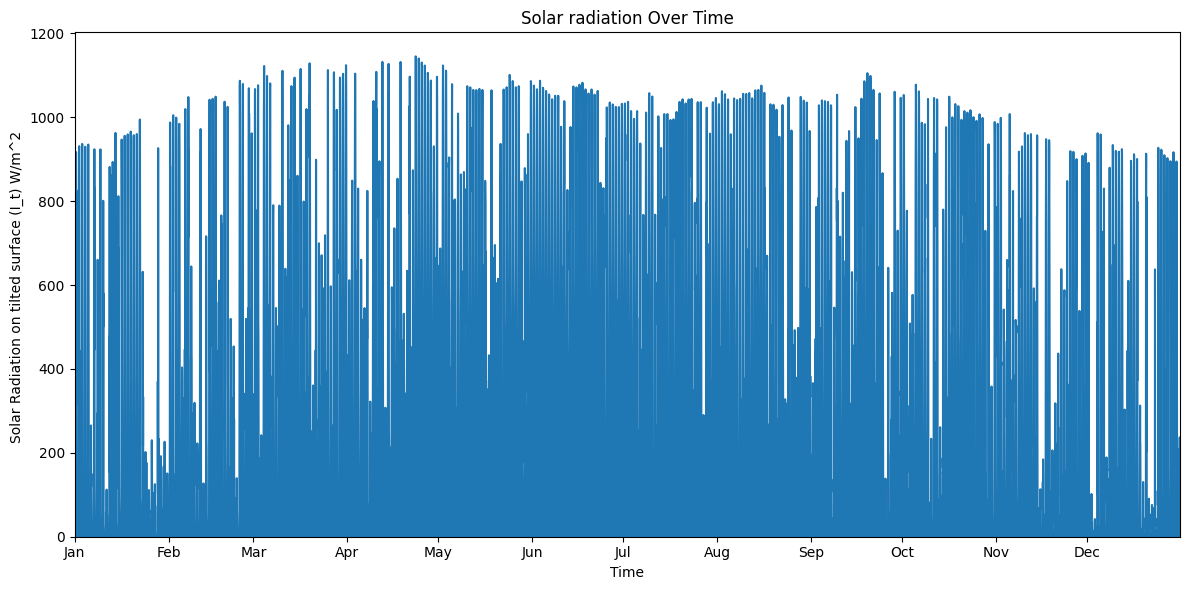

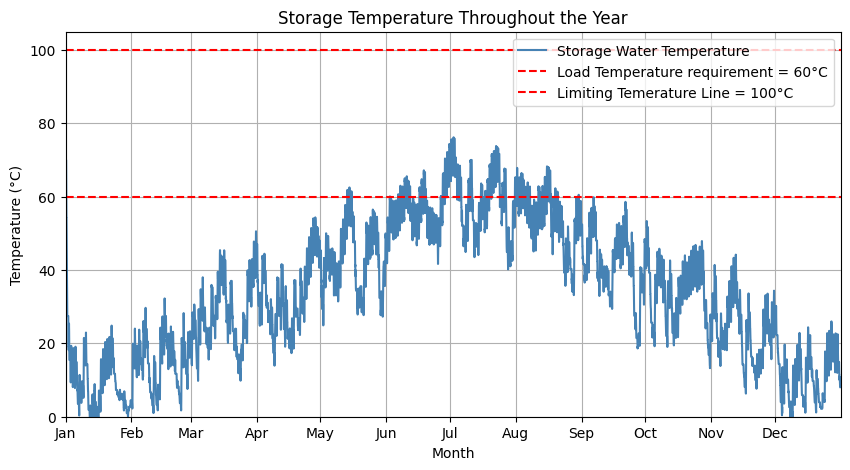

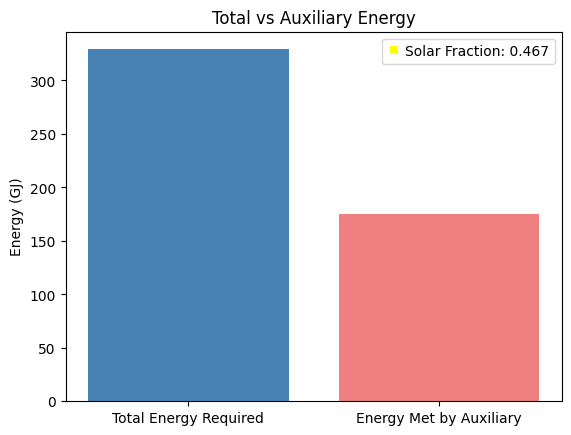

In [6]:
simulation.simulate_entire_year()

The simulations show a significant drop of the storage temerature ($T_{st}$) during the winter months `October` to `March`. We can see the temerature starting to rise during the summer. 

From the above simulations, we can infer that the stroage temerature $T_{st}$ is quite low because the ambient temperature ($T_a$) is quite low during the winters.


This implies that we should increase the Solar Collector area ($A_c$) significantly to account for winters

Lets try increasing the collector area to $120$ and run the simulations again!

In [7]:
simulation.collector_area = 120


Total energy consumed: 329.186 GJ
Auxiliary energy consumed: 101.518 GJ
The solar fraction (F) is: 0.692


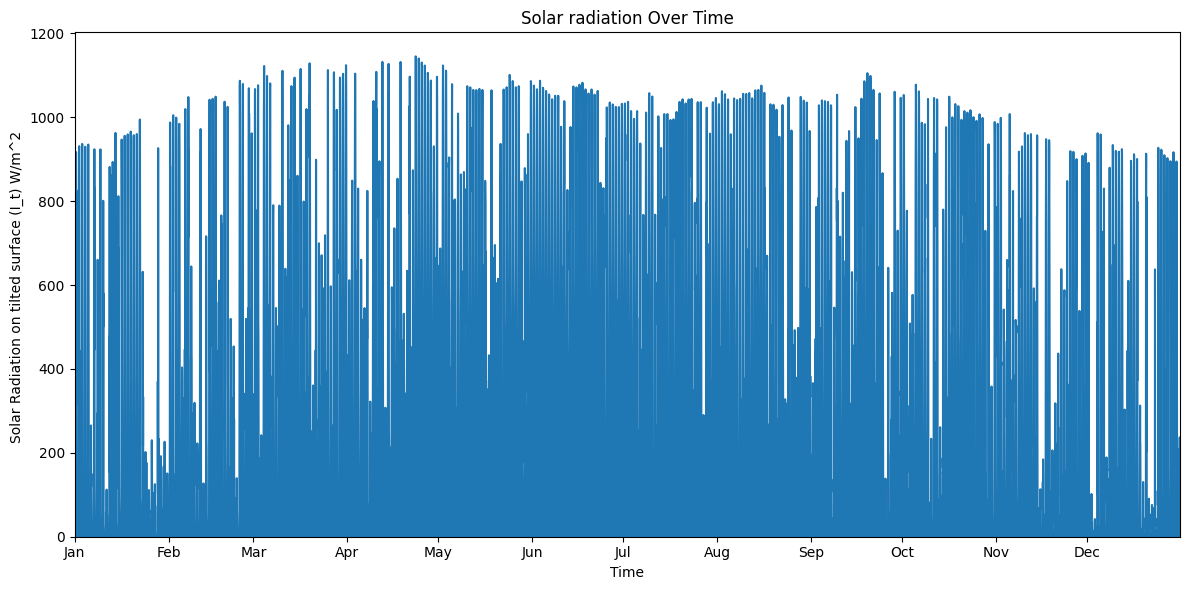

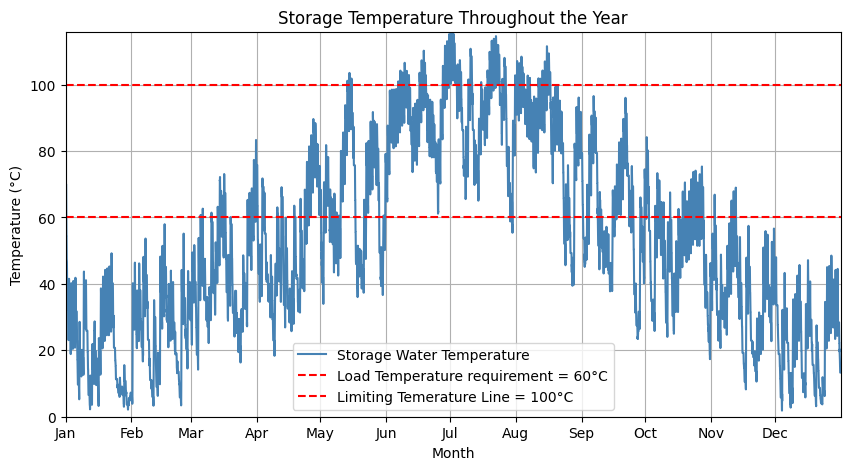

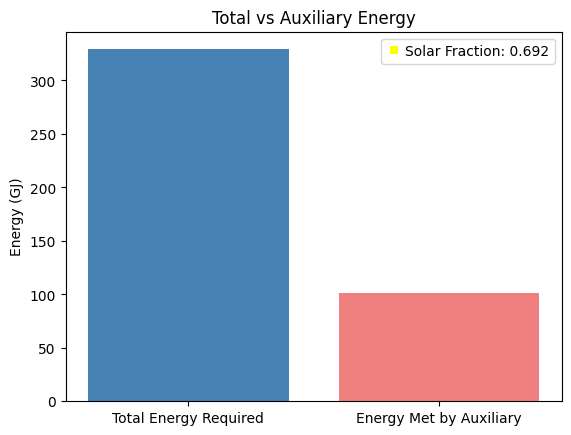

In [8]:
simulation.simulate_entire_year()


With collector area $A_c = 120$, the temerature of water inside the storage tank ($T_{st}$) shoots above $100°C$ during the months of `June` to `July`.


This is an undesirable situation since it will lead to **steam formation** and our system is designed to function only when the temerature of water is below $100 °C$. 


It implies that we must, Increase the storage tank volume  $V_{st}$, to aviod steam formation.

We will need a large solar collector to account for winters, lets keep $A_c = 120$ 


In [9]:
simulation.storage_tank_volume = 12
simulation.collector_area = 120

Total energy consumed: 329.186 GJ
Auxiliary energy consumed: 93.882 GJ
The solar fraction (F) is: 0.715


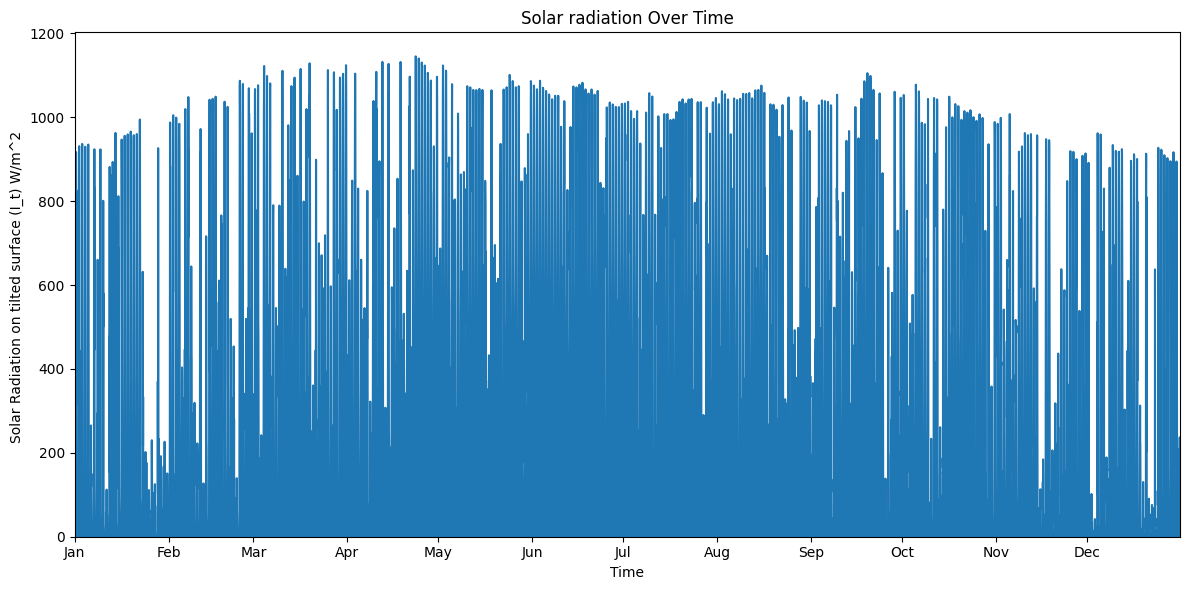

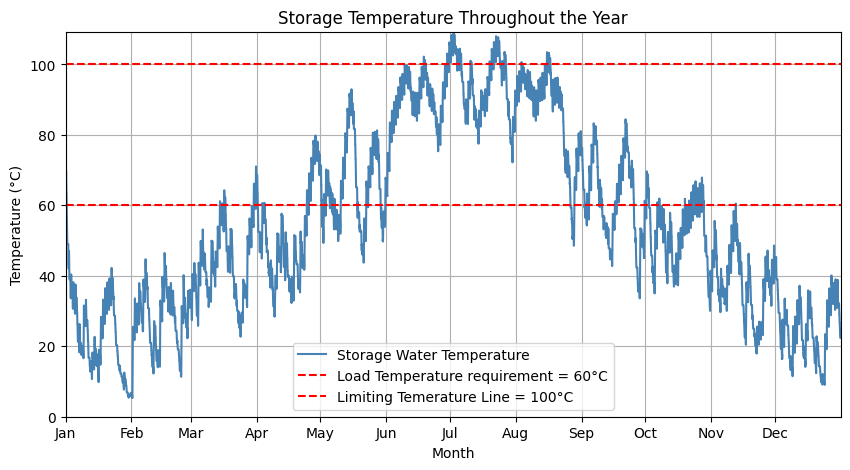

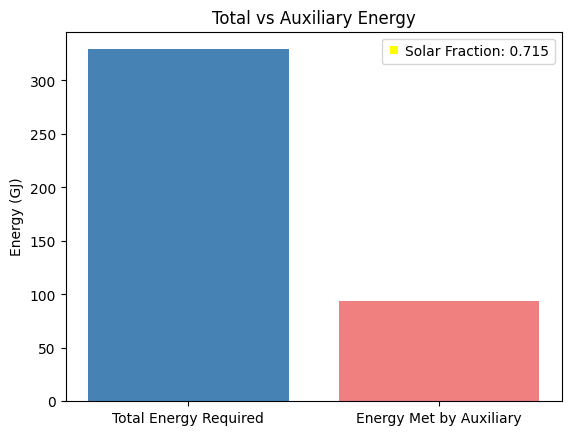

In [10]:
simulation.simulate_entire_year()

The storage temperature is still above  **Limiting temerature line (100 °C)** during the months of `June` to `July`.

We can try to decrease the collector area $A_c = 95$ and see the results. 

In [11]:
simulation.collector_area = 95
simulation.storage_tank_volume = 12

Total energy consumed: 329.186 GJ
Auxiliary energy consumed: 113.348 GJ
The solar fraction (F) is: 0.656


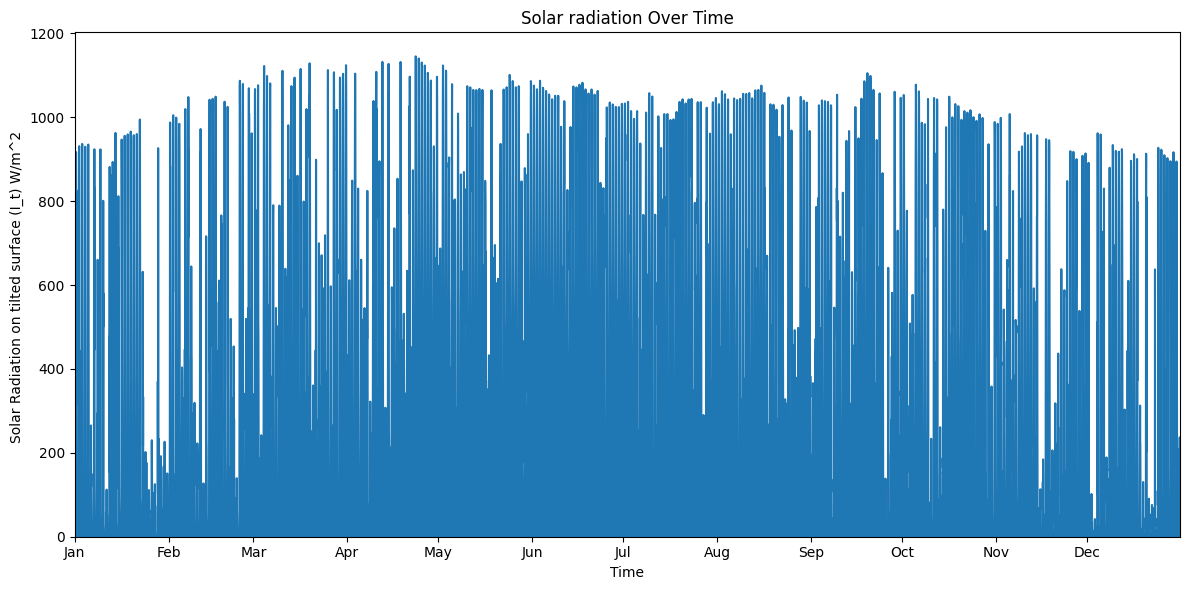

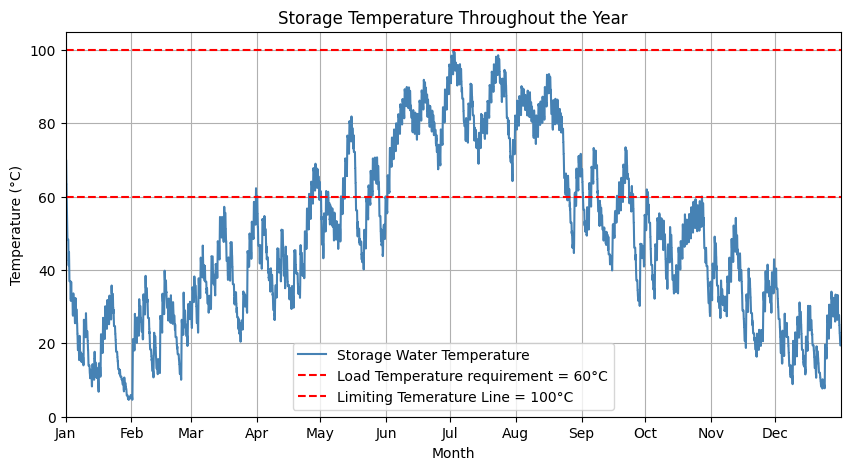

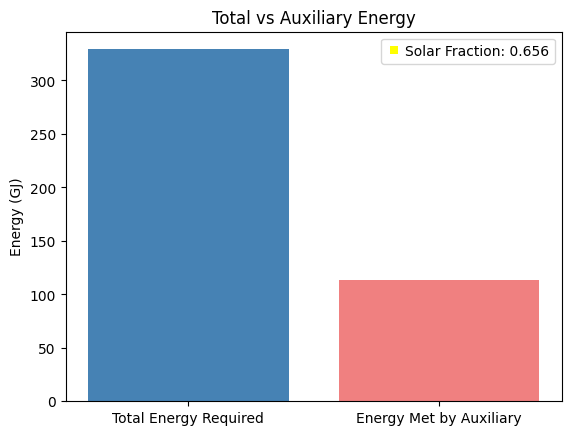

In [12]:
simulation.simulate_entire_year()

Since, the temeperature stays below $100 °C$ throughout the year we can obtain a solar fraction $F = 0.656$ for an appartment building in `Salt Lake City`, with a requirement of $4500 L/day$ of hot water per day at $60 °C$

Design parameter:
1. Solar collector area $A_c = 95 m^2$
2. Volume of the storage tank $V_{st} = 12 m^3$

Based on this design, we can estimate the costs:
1. Cost of installing the solar panels
2. Cost of the installing the storage water tank 
3. Cost of fuel/electricity the auxiliary heater will require

A point to note is that we might be able to obtain a better solar fraction, if we accomodate for another heat exchanger which could remove excess heat from the storage tank to avoid steam formation. During the summers, the water temerature shoots up above $100 °C$, but a larger collector area is required to serve the winter needs. Hence, a heat exchanger could potentially be used to remove excess heat. 

Calculating these costs are currently beyond the scope of this work and is something I would like to impelment in the future.